In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Apply_Rate_2019.csv')
df

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5,0,1/21/2018,-7.613810e+18
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5,0,1/21/2018,-1.361820e+18
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5,1,1/21/2018,-1.361820e+18
3,0.000000,0.207074,0.000000,0.021350,0.021491,0.0,2,0,1/21/2018,-1.340660e+18
4,NaN,NaN,0.000000,0.017114,0.017341,0.0,12,0,1/21/2018,3.137310e+18
...,...,...,...,...,...,...,...,...,...,...
1048570,0.000000,0.000000,1.271010,0.000001,0.035763,NaN,3,0,1/27/2018,7.929050e+18
1048571,0.000000,0.000000,0.000000,0.027681,0.027452,1.0,2,0,1/27/2018,-5.302120e+18
1048572,6.580224,0.047161,2.387810,0.010552,0.011476,1.0,12,0,1/27/2018,-6.998220e+18
1048573,0.000000,0.039594,0.998885,0.016936,0.016895,0.0,24,0,1/27/2018,-7.435860e+18


In [3]:
df.dtypes

title_proximity_tfidf          float64
description_proximity_tfidf    float64
main_query_tfidf               float64
query_jl_score                 float64
query_title_score              float64
city_match                     float64
job_age_days                     int64
apply                            int64
search_date_pacific             object
class_id                       float64
dtype: object

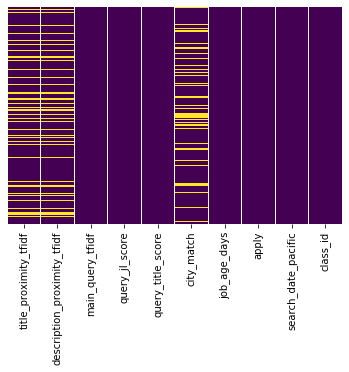

In [4]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')#empty values present, data cleaning needed

In [3]:
#replace missing data of with the mean of the column
import pandas as pd

trainingData = df.iloc[:, :].values

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(trainingData[:, 0:1])
trainingData[:, 0:1] = imputer.transform(trainingData[:, 0:1])
imputer = imputer.fit(trainingData[:, 1:2])
trainingData[:, 1:2] = imputer.transform(trainingData[:, 1:2])
imputer = imputer.fit(trainingData[:, 5:6])
trainingData[:, 5:6] = imputer.transform(trainingData[:, 5:6])

In [4]:
trainin = pd.DataFrame(trainingData, columns = df.columns)
trainin

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0,0,0,0.00482432,0.00662807,0,5,0,1/21/2018,-7.61381e+18
1,11.874,0.043637,2.52708,0.0119353,0.011208,0,5,0,1/21/2018,-1.36182e+18
2,11.874,0.043637,2.52708,0.0119353,0.011208,0,5,1,1/21/2018,-1.36182e+18
3,0,0.207074,0,0.0213498,0.0214915,0,2,0,1/21/2018,-1.34066e+18
4,5.89569,0.0959047,0,0.0171143,0.0173414,0,12,0,1/21/2018,3.13731e+18
...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,1.27101,1e-06,0.0357625,0.563786,3,0,1/27/2018,7.92905e+18
1048571,0,0,0,0.0276808,0.027452,1,2,0,1/27/2018,-5.30212e+18
1048572,6.58022,0.0471611,2.38781,0.0105524,0.0114756,1,12,0,1/27/2018,-6.99822e+18
1048573,0,0.0395943,0.998885,0.0169361,0.0168947,0,24,0,1/27/2018,-7.43586e+18


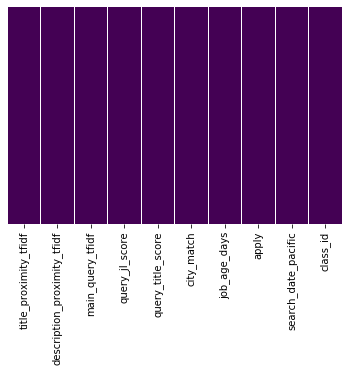

In [22]:
sns.heatmap(trainin.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')#all null values cleared

# Manual splitting of X-train, X_test, y_train, y_test

In [5]:
trainin.iloc[946840]

title_proximity_tfidf              5.89569
description_proximity_tfidf      0.0959047
main_query_tfidf                         0
query_jl_score                    0.017302
query_title_score                0.0576471
city_match                               1
job_age_days                             0
apply                                    0
search_date_pacific              1/27/2018
class_id                      -1.62741e+18
Name: 946840, dtype: object

In [6]:
trainin.iloc[946839]

title_proximity_tfidf             5.89569
description_proximity_tfidf     0.0959047
main_query_tfidf                        0
query_jl_score                  0.0172061
query_title_score               0.0240904
city_match                              1
job_age_days                          116
apply                                   0
search_date_pacific             1/26/2018
class_id                       8.2385e+18
Name: 946839, dtype: object

In [7]:
X = trainin.iloc[0:946840]
X

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0,0,0,0.00482432,0.00662807,0,5,0,1/21/2018,-7.61381e+18
1,11.874,0.043637,2.52708,0.0119353,0.011208,0,5,0,1/21/2018,-1.36182e+18
2,11.874,0.043637,2.52708,0.0119353,0.011208,0,5,1,1/21/2018,-1.36182e+18
3,0,0.207074,0,0.0213498,0.0214915,0,2,0,1/21/2018,-1.34066e+18
4,5.89569,0.0959047,0,0.0171143,0.0173414,0,12,0,1/21/2018,3.13731e+18
...,...,...,...,...,...,...,...,...,...,...
946835,10.6012,0.0381918,3.01471,0.00719425,0.0299402,1,10,1,1/26/2018,4.31542e+18
946836,23.3885,0,7.05491,1e-06,0.217987,0.563786,8,0,1/26/2018,-7.62929e+18
946837,5.89569,0.0959047,0,0.0172061,0.115212,1,3,1,1/26/2018,-6.41657e+18
946838,5.89569,0.0959047,0,0.0172061,0.115212,1,3,0,1/26/2018,-6.41657e+18


In [8]:
X.dtypes

title_proximity_tfidf          object
description_proximity_tfidf    object
main_query_tfidf               object
query_jl_score                 object
query_title_score              object
city_match                     object
job_age_days                   object
apply                          object
search_date_pacific            object
class_id                       object
dtype: object

In [9]:
Xtrain = X.drop(['apply', 'search_date_pacific'], axis = 1)
X_train1 = Xtrain.astype(float)

In [10]:
X_train.dtypes

NameError: name 'X_train' is not defined

In [11]:
X_train1

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.000000,5.0,-7.613810e+18
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.000000,5.0,-1.361820e+18
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.000000,5.0,-1.361820e+18
3,0.000000,0.207074,0.000000,0.021350,0.021491,0.000000,2.0,-1.340660e+18
4,5.895695,0.095905,0.000000,0.017114,0.017341,0.000000,12.0,3.137310e+18
...,...,...,...,...,...,...,...,...
946835,10.601199,0.038192,3.014709,0.007194,0.029940,1.000000,10.0,4.315420e+18
946836,23.388496,0.000000,7.054908,0.000001,0.217987,0.563786,8.0,-7.629290e+18
946837,5.895695,0.095905,0.000000,0.017206,0.115212,1.000000,3.0,-6.416570e+18
946838,5.895695,0.095905,0.000000,0.017206,0.115212,1.000000,3.0,-6.416570e+18


In [12]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946840 entries, 0 to 946839
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   title_proximity_tfidf        946840 non-null  float64
 1   description_proximity_tfidf  946840 non-null  float64
 2   main_query_tfidf             946840 non-null  float64
 3   query_jl_score               946840 non-null  float64
 4   query_title_score            946840 non-null  float64
 5   city_match                   946840 non-null  float64
 6   job_age_days                 946840 non-null  float64
 7   class_id                     946840 non-null  float64
dtypes: float64(8)
memory usage: 57.8 MB


In [13]:
ytrain = X['apply']
y_train = ytrain.astype(int)

In [14]:
y_train

0         0
1         0
2         1
3         0
4         0
         ..
946835    1
946836    0
946837    1
946838    0
946839    0
Name: apply, Length: 946840, dtype: int32

In [15]:
y_train.dtypes

dtype('int32')

In [16]:
Xtest = trainin.iloc[946840:].drop(['apply','search_date_pacific'], axis = 1)
X_test1 = Xtest.astype(float)
X_test1

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
946840,5.895695,0.095905,0.000000,0.017302,0.057647,1.000000,0.0,-1.627410e+18
946841,0.000000,0.000000,0.000000,0.000001,0.066933,0.000000,23.0,-4.397800e+18
946842,18.380564,0.031903,3.997039,0.053382,0.061574,1.000000,23.0,-7.268110e+18
946843,31.789100,0.031698,7.203991,0.017005,0.177488,0.563786,5.0,-7.485610e+18
946844,0.000000,0.000000,0.000000,0.005744,0.006487,1.000000,4.0,-6.998220e+18
...,...,...,...,...,...,...,...,...
1048570,0.000000,0.000000,1.271010,0.000001,0.035763,0.563786,3.0,7.929050e+18
1048571,0.000000,0.000000,0.000000,0.027681,0.027452,1.000000,2.0,-5.302120e+18
1048572,6.580224,0.047161,2.387810,0.010552,0.011476,1.000000,12.0,-6.998220e+18
1048573,0.000000,0.039594,0.998885,0.016936,0.016895,0.000000,24.0,-7.435860e+18


In [17]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101735 entries, 946840 to 1048574
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   title_proximity_tfidf        101735 non-null  float64
 1   description_proximity_tfidf  101735 non-null  float64
 2   main_query_tfidf             101735 non-null  float64
 3   query_jl_score               101735 non-null  float64
 4   query_title_score            101735 non-null  float64
 5   city_match                   101735 non-null  float64
 6   job_age_days                 101735 non-null  float64
 7   class_id                     101735 non-null  float64
dtypes: float64(8)
memory usage: 6.2 MB


In [18]:
ytest = trainin.iloc[946840:]['apply']
y_test = ytest.astype(int)
y_test

946840     0
946841     0
946842     0
946843     0
946844     0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: apply, Length: 101735, dtype: int32

In [19]:
y_test.dtypes

dtype('int32')

# Checking Correlation of Data

In [24]:
trainin_corr = df.corr()
trainin_corr

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,class_id
title_proximity_tfidf,1.000000,0.108142,0.704599,0.208598,0.371299,-0.060206,0.043088,0.049053,0.017825
description_proximity_tfidf,0.108142,1.000000,0.022879,0.095541,0.003466,-0.009972,0.012185,-0.003721,0.005579
main_query_tfidf,0.704599,0.022879,1.000000,0.010720,0.208431,-0.077039,0.087225,0.039245,0.018815
query_jl_score,0.208598,0.095541,0.010720,1.000000,0.387831,-0.017568,0.017021,0.057803,0.078302
query_title_score,0.371299,0.003466,0.208431,0.387831,1.000000,-0.042187,0.016559,0.064357,0.062467
city_match,-0.060206,-0.009972,-0.077039,-0.017568,-0.042187,1.000000,-0.000365,0.002952,-0.004589
job_age_days,0.043088,0.012185,0.087225,0.017021,0.016559,-0.000365,1.000000,-0.012020,0.003495
apply,0.049053,-0.003721,0.039245,0.057803,0.064357,0.002952,-0.012020,1.000000,0.012576
class_id,0.017825,0.005579,0.018815,0.078302,0.062467,-0.004589,0.003495,0.012576,1.000000


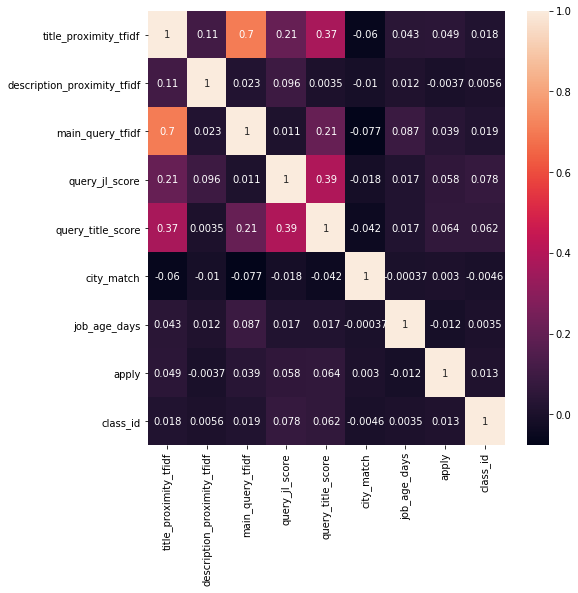

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(trainin_corr, annot = True)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[53100 39446]
 [ 5010  4179]]
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     92546
           1       0.10      0.45      0.16      9189

    accuracy                           0.56    101735
   macro avg       0.50      0.51      0.43    101735
weighted avg       0.84      0.56      0.66    101735



# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[92024   522]
 [ 9130    59]]


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     92546
           1       0.10      0.01      0.01      9189

    accuracy                           0.91    101735
   macro avg       0.51      0.50      0.48    101735
weighted avg       0.84      0.91      0.87    101735



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, verbose =100)
rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.6s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.0s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.3s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.9s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   34.8s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   40.3s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   45.2s remaining: 

[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:  6.3min remaining:    0.0s
building tree 80 of 200
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.4min remaining:    0.0s
building tree 81 of 200
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  6.5min remaining:    0.0s
building tree 82 of 200
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:  6.5min remaining:    0.0s
building tree 83 of 200
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:  6.6min remaining:    0.0s
building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:  6.7min remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:  6.8min remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:  6.8min remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:  6.9min remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:  7.0min rem

In [ ]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

# Scaling using Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler #scaling the data

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(trainin.drop(['apply', 'search_date_pacific'], axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(trainin.drop(['apply', 'search_date_pacific'], axis = 1))

In [11]:
col = trainin.columns.drop(['apply', 'search_date_pacific'])
col

Index(['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days', 'class_id'],
      dtype='object')

In [12]:
df_feat = pd.DataFrame(scaled_features, columns=col)
df_feat

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
0,-6.802676e-01,-3.803601e-01,-0.791464,-1.006363,-0.596950,-1.281898e+00,-0.292087,-1.274350
1,6.898043e-01,-2.072947e-01,0.337822,-0.423745,-0.503286,-1.281898e+00,-0.292087,-0.170460
2,6.898043e-01,-2.072947e-01,0.337822,-0.423745,-0.503286,-1.281898e+00,-0.292087,-0.170460
3,-6.802676e-01,4.408985e-01,-0.791464,0.347601,-0.292981,-1.281898e+00,-0.463783,-0.166724
4,-3.074442e-16,-2.201584e-16,-0.791464,0.000580,-0.377854,-1.281898e+00,0.108537,0.623934
...,...,...,...,...,...,...,...,...
1048570,-6.802676e-01,-3.803601e-01,-0.223483,-1.401547,-0.001127,-2.524350e-16,-0.406551,1.469993
1048571,-6.802676e-01,-3.803601e-01,-0.791464,0.866311,-0.171084,9.918341e-01,-0.463783,-0.866184
1048572,7.898363e-02,-1.933181e-01,0.275586,-0.537052,-0.497813,9.918341e-01,0.108537,-1.165658
1048573,-6.802676e-01,-2.233283e-01,-0.345088,-0.014021,-0.386989,-1.281898e+00,0.795322,-1.242930


# Dimension Reduction using Principal Components Analysis

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_feat)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
x_pca = pca.transform(df_feat)

In [15]:
print(df_feat.shape)
print(x_pca.shape)

(1048575, 8)
(1048575, 2)


In [16]:
x_pca_tab = pd.DataFrame(x_pca, columns = ['First Component', 'Second Component'])
x_pca_tab

,First Component,Second Component
0,-1.518876,0.813203
1,0.226308,0.947401
2,0.226308,0.947401
3,-0.736209,-0.627491
4,-0.426908,-0.301770
...,...,...
1048570,-0.962709,0.089883
1048571,-0.820457,-0.928216
1048572,-0.422073,0.983583
1048573,-0.732980,0.517511


Text(0, 0.5, 'Second Principal Component')

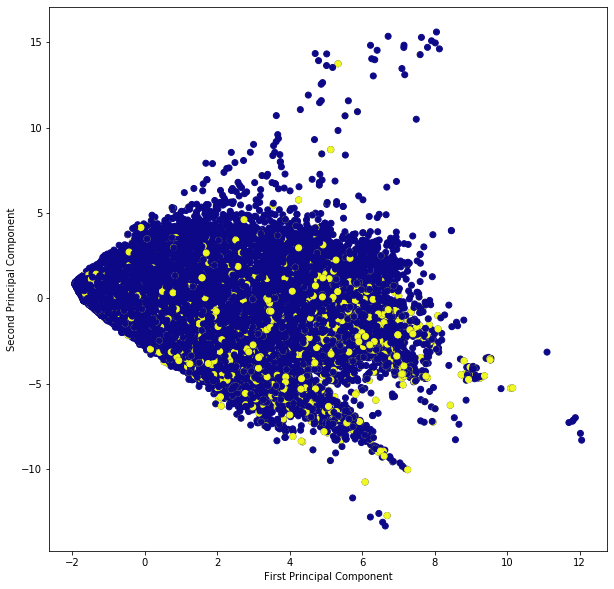

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca_tab['First Component'],x_pca_tab['Second Component'], c = trainin['apply'], cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Manual splitting of X-train, X_test, y_train, y_test for the PCA Data

In [38]:
x_pca_tab.dtypes

First Component     float64
Second Component    float64
dtype: object

In [39]:
X_train = x_pca_tab.iloc[0:946840]
X_train

,First Component,Second Component
0,-1.518876,0.813203
1,0.226308,0.947401
2,0.226308,0.947401
3,-0.736209,-0.627491
4,-0.426908,-0.301770
...,...,...
946835,0.233036,0.618641
946836,3.567571,1.675760
946837,0.193037,-0.817741
946838,0.193037,-0.817741


In [40]:
X_test = x_pca_tab.iloc[946840:]
X_test

,First Component,Second Component
946840,-0.322006,-0.709987
946841,-0.920203,0.641022
946842,2.506200,-0.747929
946843,4.259551,1.315346
946844,-1.662415,0.476968
...,...,...
1048570,-0.962709,0.089883
1048571,-0.820457,-0.928216
1048572,-0.422073,0.983583
1048573,-0.732980,0.517511


In [41]:
y_train

0         0
1         0
2         1
3         0
4         0
         ..
946835    1
946836    0
946837    1
946838    0
946839    0
Name: apply, Length: 946840, dtype: int32

In [42]:
y_test

946840     0
946841     0
946842     0
946843     0
946844     0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: apply, Length: 101735, dtype: int32

# Support Vector Machine on PCA Data

# K Nearest Neigbors on PCA Data

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[88100  4446]
 [ 8681   508]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     92546
           1       0.10      0.06      0.07      9189

    accuracy                           0.87    101735
   macro avg       0.51      0.50      0.50    101735
weighted avg       0.84      0.87      0.85    101735



# K Nearest Neighors on Original Data

In [55]:
knn.fit(X_train1, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [56]:
pred1 = knn.predict(X_test1)
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

[[88348  4198]
 [ 8660   529]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     92546
           1       0.11      0.06      0.08      9189

    accuracy                           0.87    101735
   macro avg       0.51      0.51      0.50    101735
weighted avg       0.84      0.87      0.85    101735



# Deep Neural Network

In [20]:
X_train1

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.000000,5.0,-7.613810e+18
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.000000,5.0,-1.361820e+18
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.000000,5.0,-1.361820e+18
3,0.000000,0.207074,0.000000,0.021350,0.021491,0.000000,2.0,-1.340660e+18
4,5.895695,0.095905,0.000000,0.017114,0.017341,0.000000,12.0,3.137310e+18
...,...,...,...,...,...,...,...,...
946835,10.601199,0.038192,3.014709,0.007194,0.029940,1.000000,10.0,4.315420e+18
946836,23.388496,0.000000,7.054908,0.000001,0.217987,0.563786,8.0,-7.629290e+18
946837,5.895695,0.095905,0.000000,0.017206,0.115212,1.000000,3.0,-6.416570e+18
946838,5.895695,0.095905,0.000000,0.017206,0.115212,1.000000,3.0,-6.416570e+18


In [21]:
X_test1

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
946840,5.895695,0.095905,0.000000,0.017302,0.057647,1.000000,0.0,-1.627410e+18
946841,0.000000,0.000000,0.000000,0.000001,0.066933,0.000000,23.0,-4.397800e+18
946842,18.380564,0.031903,3.997039,0.053382,0.061574,1.000000,23.0,-7.268110e+18
946843,31.789100,0.031698,7.203991,0.017005,0.177488,0.563786,5.0,-7.485610e+18
946844,0.000000,0.000000,0.000000,0.005744,0.006487,1.000000,4.0,-6.998220e+18
...,...,...,...,...,...,...,...,...
1048570,0.000000,0.000000,1.271010,0.000001,0.035763,0.563786,3.0,7.929050e+18
1048571,0.000000,0.000000,0.000000,0.027681,0.027452,1.000000,2.0,-5.302120e+18
1048572,6.580224,0.047161,2.387810,0.010552,0.011476,1.000000,12.0,-6.998220e+18
1048573,0.000000,0.039594,0.998885,0.016936,0.016895,0.000000,24.0,-7.435860e+18


In [22]:
y_train

0         0
1         0
2         1
3         0
4         0
         ..
946835    1
946836    0
946837    1
946838    0
946839    0
Name: apply, Length: 946840, dtype: int32

In [23]:
y_test

946840     0
946841     0
946842     0
946843     0
946844     0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: apply, Length: 101735, dtype: int32

In [26]:
from sklearn import model_selection
from sklearn import metrics
import tensorflow as tf

# Build 3 layer DNN with 10, 20, 10 units respectively.

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train1)

classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=2)

# Fit and predict.
classifier.fit(X_train1, y_train, steps=200)
predictions = list(classifier.predict(X_test1, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:f}'.format(score))

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000B7DDECC648>, '_master':

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\AOM\AppData\Local\Temp\tmpxftie7cj\model.ckpt.
INFO:tensorflow:loss = 3.58808e+17, step = 1
INFO:tensorflow:Saving checkpoints for 16 into C:\Users\AOM\AppData\Local\Temp\tmpxftie7cj\model.ckpt.
INFO:tensorflow:Saving checkpoints for 32 into C:\Users\AOM\AppData\Local\Temp\tmpxftie7cj\model.ckpt.
INFO:tensorflow:Saving 

INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\AOM\AppData\Local\Temp\tmpxftie7cj\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Accuracy: 0.909677


In [27]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[92546     0]
 [ 9189     0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     92546
           1       0.00      0.00      0.00      9189

    accuracy                           0.91    101735
   macro avg       0.45      0.50      0.48    101735
weighted avg       0.83      0.91      0.87    101735



In [63]:
#configure the neurak network
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(8,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='relu'))

In [64]:
#information on the created model
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.15963823, -0.33990055,  0.4163894 ,  0.11746782, -0.21234098,
          0.00220066,  0.18829387,  0.5313456 ,  0.5442376 , -0.5034628 ,
         -0.4423952 , -0.09961325],
        [-0.45270678,  0.5219147 , -0.2656394 ,  0.32455266,  0.38728923,
          0.34264565,  0.13040888,  0.43242604, -0.0077374 , -0.19315642,
          0.25158143, -0.52087504],
        [-0.04897204,  0.18224728,  0.2057141 ,  0.54030013,  0.01663423,
          0.25875652, -0.24084112, -0.1837681 ,  0.2672972 , -0.42310512,
          0.02075046,  0.25008124],
        [-0.23644125,  0.45493972, -0.51067144, -0.24125654, -0.45885965,
          0.42252022, -0.09997955,  0.5135057 ,  0.54543114, -0.38075608,
         -0.52077395, -0.05997401],
        [-0.29832852,  0.4306988 , -0.29033527, -0.23530841,  0.22731632,
          0.47770905,  0.22482175, -0.22779232, -0.24802485,  0.39266694,
          0.19914204,  0.27378047],
        [ 0.47415543,  0.02687693,  0.2139988 , -0.47193027,  0.47457862,
      

In [65]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                   
model.fit(X_train1, y_train,epochs=1, batch_size=1, verbose=1)

Epoch 1/1
946840/946840 [==============================] - 1371s 1ms/step - loss: 1.3862 - accuracy: 0.9101


In [66]:
y_pred = model.predict(X_test1)

In [67]:
score = model.evaluate(X_test1, y_test,verbose=1)

101735/101735 [==============================] - 2s 19us/step


In [68]:
score

[1.3932260450405436, 0.9096770882606506]

In [69]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92546     0]
 [ 9189     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     92546
           1       0.00      0.00      0.00      9189

    accuracy                           0.91    101735
   macro avg       0.45      0.50      0.48    101735
weighted avg       0.83      0.91      0.87    101735

